In [41]:
import numpy as np
import healpy as hp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
import random


NSIDE = 32   # this is about 1.8 deg between bins... https://lambda.gsfc.nasa.gov/toolbox/tb_pixelcoords.cfm
n_dec_bins = 100

# define some helper functions

#convert healpy "theta" to dec
def theta_to_dec(theta):
    # shift dec from 0-180 to (90, -90)   (note -1.0*(theta-90) to get North pole at 0 "theta" for healpy)
    return -1.0*(theta - np.pi/2.0)

#find out which bin an event is in based on "the_bins" boundaries
def which_dec_bin(dec, the_bins):
        for i in range(0, len(the_bins)-1):
            if the_bins[i] <= dec < the_bins[i+1]:
                return i

TX_Ra = np.deg2rad(77.3582)
TX_Dec = theta_to_dec(np.deg2rad(5.69314))
TX_bin = hp.ang2pix(NSIDE, TX_Dec, TX_Ra)
print(TX_bin)

5595


In [38]:
# let's load up the data
np_dtype = np.float64
data_7 = np.genfromtxt('./data/icecube_10year_ps/events/IC86_VII_exp.csv', names=True, dtype=np_dtype)
data_6 = np.genfromtxt('./data/icecube_10year_ps/events/IC86_VI_exp.csv', names=True, dtype=np_dtype)
data_5 = np.genfromtxt('./data/icecube_10year_ps/events/IC86_V_exp.csv', names=True, dtype=np_dtype)
data_4 = np.genfromtxt('./data/icecube_10year_ps/events/IC86_IV_exp.csv', names=True, dtype=np_dtype)
data_3 = np.genfromtxt('./data/icecube_10year_ps/events/IC86_III_exp.csv', names=True, dtype=np_dtype)
data_2 = np.genfromtxt('./data/icecube_10year_ps/events/IC86_II_exp.csv', names=True, dtype=np_dtype)
data_1 = np.genfromtxt('./data/icecube_10year_ps/events/IC86_I_exp.csv', names=True, dtype=np_dtype)
## Concantenate these together into 1
data_7y = np.concatenate((data_7, data_6, data_5, data_4, data_3, data_2, data_1))
#data_7y = np.concatenate((data_7, data_6))

In [42]:
## Ensure that everything got put together correctly...
print(len(data_7y))
#print(len(data_1)+len(data_2)+len(data_3)+len(data_4)+len(data_5)+len(data_6)+len(data_7))
data_7y

897406


array([(57891.17694387, 2.9 , 0.89, 343.245,  13.768,  46.287, 103.86 ),
       (57891.18095108, 3.13, 0.35, 127.003,  35.576, 263.912, 125.521),
       (57891.18877491, 4.7 , 0.2 , 216.473, -23.266, 177.292,  66.652),
       ...,
       (56062.4089819 , 2.79, 3.03, 240.151,  51.702, 230.512, 141.666),
       (56062.41103019, 3.42, 0.74, 245.893,  37.043, 225.485, 127.012),
       (56062.41621633, 2.84, 0.2 , 346.941,  67.104, 126.317, 157.163)],
      dtype=[('MJDdays', '<f8'), ('log10EGeV', '<f8'), ('AngErrdeg', '<f8'), ('RAdeg', '<f8'), ('Decdeg', '<f8'), ('Azimuthdeg', '<f8'), ('Zenithdeg', '<f8')])

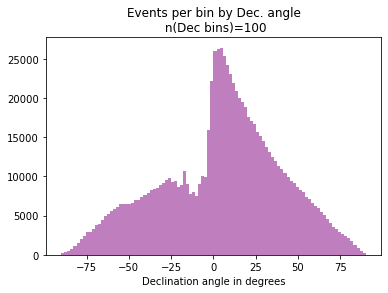

[  285.   297.   428.   760.  1133.  1446.  2007.  2403.  2862.  2930.
  3273.  3806.  3952.  4400.  4930.  5219.  5564.  5813.  6151.  6481.
  6534.  6423.  6468.  6626.  6960.  7042.  7381.  7569.  7835.  8303.
  8442.  8524.  8887.  9209.  9515.  9853.  9306.  9394.  8698.  8911.
 10723.  8996.  7749.  8007.  7469.  9032. 10086.  9942. 15928. 22210.
 25985. 26225. 26431. 25326. 24279. 23122. 21913. 20913. 20041. 19565.
 18846. 17617. 17114. 16719. 15695. 15133. 14516. 13720. 13116. 12507.
 11979. 11335. 10999. 10466.  9895.  9432.  9192.  8709.  8311.  7968.
  7421.  7158.  6656.  6281.  5955.  5409.  5104.  4513.  4098.  3590.
  3336.  2944.  2640.  2396.  2098.  1802.  1271.   886.   443.   174.] [-8.995700e+01 -8.815766e+01 -8.635832e+01 -8.455898e+01 -8.275964e+01
 -8.096030e+01 -7.916096e+01 -7.736162e+01 -7.556228e+01 -7.376294e+01
 -7.196360e+01 -7.016426e+01 -6.836492e+01 -6.656558e+01 -6.476624e+01
 -6.296690e+01 -6.116756e+01 -5.936822e+01 -5.756888e+01 -5.576954e+01
 -5.3

In [43]:
#let's bin the data into n_dec_bins using the hist function from pyply package
# plt.hist returns 2 objects we need:  list of counts in each bin (n_dec_bins, and list of bin boundaries (n_dec_bins +1)
dec_label = "Events per bin by Dec. angle\n n(Dec bins)=" + str(n_dec_bins)
decbin_content,decbin_boundaries,extra = plt.hist(data_7y['Decdeg'], n_dec_bins, facecolor='purple', alpha=0.5)
plt.xlabel('Declination angle in degrees')
plt.title(dec_label)
plt.show()
print(decbin_content,decbin_boundaries)

In [44]:
#Let's calculate the number of PIXELS in each dec band using the position of each
# generate a list of pixel
dec_vals = []
theta_values = []
for bin in range(0,hp.nside2npix(NSIDE)):
    theta,phi = hp.pix2ang(NSIDE,bin)
    dec_vals.append(np.degrees(theta_to_dec(theta)))
    
dec_vals2 = np.array(dec_vals)

# use numpy's digitize function to "count in bins" -> returns an array telling you which bin each value is in
hp_bins_mask = np.digitize(dec_vals2, decbin_boundaries)

# count number of bins at each bin mask value:  total in that dec range
hp_bins_perdec = [len(dec_vals2[hp_bins_mask == i]) for i in range(1, len(decbin_boundaries))]

print(len(hp_bins_perdec),hp_bins_perdec,sum(hp_bins_perdec))

100 [4, 8, 12, 16, 44, 28, 32, 36, 84, 48, 52, 56, 60, 132, 72, 76, 80, 84, 180, 96, 100, 104, 108, 112, 236, 124, 128, 128, 128, 128, 256, 128, 128, 128, 256, 128, 128, 256, 128, 256, 128, 256, 128, 256, 128, 128, 256, 128, 256, 256, 128, 256, 128, 256, 128, 128, 256, 128, 256, 128, 256, 128, 256, 128, 128, 256, 128, 128, 128, 256, 128, 128, 128, 128, 124, 236, 112, 108, 104, 100, 96, 180, 84, 80, 76, 72, 132, 60, 56, 52, 48, 84, 36, 32, 28, 44, 16, 12, 8, 4] 12288


In [45]:
# now let's calculate the averge background per-pixel in each dec band
avg_bkg_perbin = decbin_content/hp_bins_perdec
print(avg_bkg_perbin)

[ 71.25        37.125       35.66666667  47.5         25.75
  51.64285714  62.71875     66.75        34.07142857  61.04166667
  62.94230769  67.96428571  65.86666667  33.33333333  68.47222222
  68.67105263  69.55        69.20238095  34.17222222  67.51041667
  65.34        61.75961538  59.88888889  59.16071429  29.49152542
  56.79032258  57.6640625   59.1328125   61.2109375   64.8671875
  32.9765625   66.59375     69.4296875   71.9453125   37.16796875
  76.9765625   72.703125    36.6953125   67.953125    34.80859375
  83.7734375   35.140625    60.5390625   31.27734375  58.3515625
  70.5625      39.3984375   77.671875    62.21875     86.7578125
 203.0078125  102.44140625 206.4921875   98.9296875  189.6796875
 180.640625    85.59765625 163.3828125   78.28515625 152.8515625
  73.6171875  137.6328125   66.8515625  130.6171875  122.6171875
  59.11328125 113.40625    107.1875     102.46875     48.85546875
  93.5859375   88.5546875   85.9296875   81.765625    79.7983871
  39.96610169  82.07142

Using  12288  pixels
Plotted points:  897406


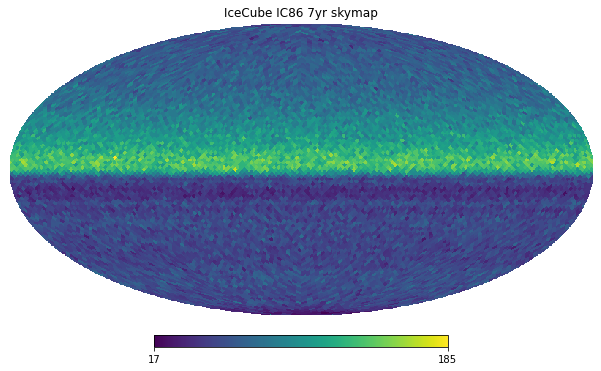

In [46]:
# Let's bin the data in a skymap healpix object
print('Using ',hp.nside2npix(NSIDE), ' pixels')
## seed skymap with 0 counts in each bin
skymap = np.zeros(hp.nside2npix(NSIDE))
n_plot = 0
for ev in data_7y:
    if np.abs(ev["Decdeg"]) < 91.0:   # must avoid poles for later analysis/scrambling
        # shift dec to 0-180 instead of 90, -90   (note -1.0* (dec-90) to get North pole at 0 "theta" for healpy)
        binnum = hp.ang2pix(NSIDE, -1.0*(np.radians(ev["Decdeg"])-np.pi/2.0), np.radians(ev["RAdeg"]))
        skymap[binnum] += 1
        n_plot += 1
hp.mollview(map=skymap, title="IceCube IC86 7yr skymap")
print('Plotted points: ', n_plot)

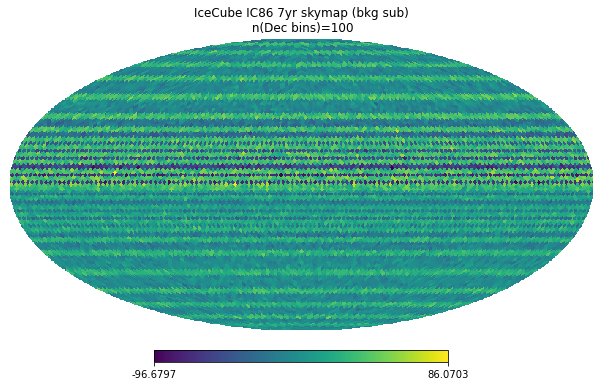

In [47]:
# Calculate the difference between observed and expected counts, as well as the poisson pmf (assuming expected bkg is average expected rate)
#then plot the difference skymap
skymap2 = []
p_val_map =[]
for bin in range(0,hp.nside2npix(NSIDE)):
    theta,phi = hp.pix2ang(NSIDE,bin)
    bkg_bin = which_dec_bin(np.degrees(theta_to_dec(theta)),decbin_boundaries)
    skymap2.append(skymap[bin] - avg_bkg_perbin[bkg_bin])
    p_val_map.append(stats.poisson.pmf(skymap[bin], avg_bkg_perbin[bkg_bin]))

title2 = "IceCube IC86 7yr skymap (bkg sub)\n n(Dec bins)=" + str(n_dec_bins)
skymap2_np  = np.array(skymap2)
hp.mollview(skymap2_np, title=title2)
#print('Plotted points: ', n_plot, ' Max bin:',np.argmax(skymap2_np), np.max(skymap2_np))
#skymap2_np

Using 100 declination bins


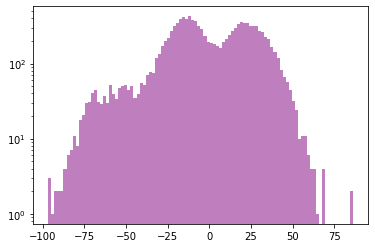

In [51]:
# plot the histogram of the 'counts - expected' values in the map
a,b,c = plt.hist(skymap2_np, n_dec_bins, facecolor='purple', alpha=0.5,log=True)
# is it centered near zero?  Does it look somewhat gaussian
print("Using " + str(n_dec_bins) +" declination bins")

15.61866774617558 6094
1.5707963267948966 0.7117670855789374
Most significant spot: log_10(pvalue): 15.61866774617558  at DEC, RA:  -0.0 40.78124999999999


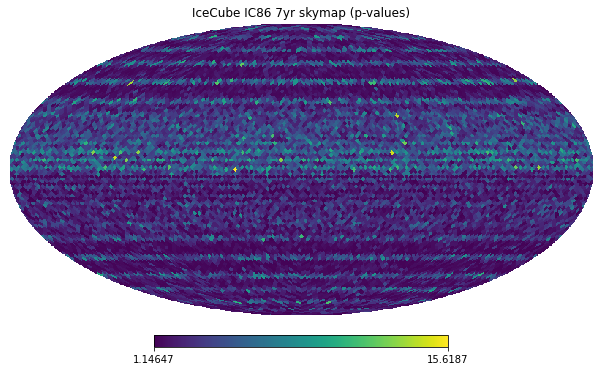

In [52]:
# plot the skymap of poission p-values (-log10(pvalue))

p_val_map_np  = -1.0*np.log10(np.array(p_val_map))
hp.mollview(p_val_map_np, title="IceCube IC86 7yr skymap (p-values)")

# Find the most interesting spot:
max_pval = np.max(p_val_map_np)
max_bin  = np.argmax(p_val_map_np)
print(max_pval, max_bin)
theta_max ,phi_max = hp.pix2ang(NSIDE,max_bin)
print(theta_max,phi_max)

print('Most significant spot: log_10(pvalue):', max_pval, ' at DEC, RA: ', np.degrees(theta_to_dec(theta_max)), np.degrees(phi_max))


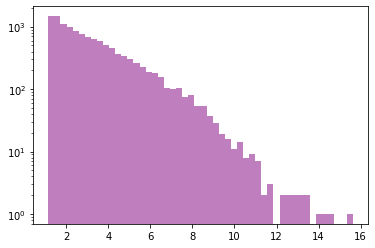

In [53]:
# plot the histogram of the p-values in the map
a,b,c = plt.hist(p_val_map_np, 50, facecolor='purple', alpha=0.5,log=True)
# is it centered near zero?  Does it look somewhat gaussian

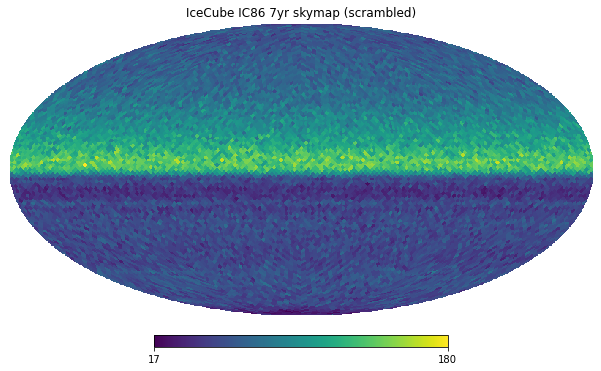

In [54]:
# let's think about scrambling...
def do_a_scramble(events):
    skymap_scr = np.zeros(hp.nside2npix(NSIDE))
    random.seed()
    for ev in events:
        if np.abs(ev["Decdeg"]) < 91.0:   # must avoid poles for later analysis/scrambling
            # generate a new random RA value (2 options, pick another RA, or pick from 0,2pi uniformly)
            new_ra = random.uniform(0,2.0*np.pi)
            binnum = hp.ang2pix(NSIDE, -1.0*(np.radians(ev["Decdeg"])-np.pi/2.0), new_ra)
            skymap_scr[binnum] += 1
    return skymap_scr

new_skymap = do_a_scramble(data_7y)
hp.mollview(new_skymap, title="IceCube IC86 7yr skymap (scrambled)")

In [55]:
# let's do many scrambles  For each scrable, calculate the most significant point and which bin that's in.
def do_n_scrambles(events, n_scrambles):
    max_p_values_scr = []
    max_p_bin_scr = []
    for trial in range(0,n_scrambles):
        this_map = do_a_scramble(events)
        this_p_val_map = []
        for bin in range(0,hp.nside2npix(NSIDE)):
            theta,phi = hp.pix2ang(NSIDE,bin)
            bkg_bin = which_dec_bin(np.degrees(theta_to_dec(theta)),decbin_boundaries)
            this_p_val_map.append(stats.poisson.pmf(this_map[bin], avg_bkg_perbin[bkg_bin]))
        this_p_val_map_np = -1.0*np.log10(np.array(this_p_val_map))
        max_p_values_scr.append(np.max(this_p_val_map_np))
        max_p_bin_scr.append(np.argmax(this_p_val_map_np))
    return max_p_values_scr, max_p_bin_scr

# test it!
p_vals_max_scr, bin_max_scr = do_n_scrambles(data_7y,n_scrambles = 10) 

print(p_vals_max_scr, bin_max_scr)
# compare where in the distribution of these scrambled max_p_values the real data is at?  Is it rare or common?

[14.734620047207464, 14.647522020574613, 14.445041935830412, 13.513447416756337, 14.48712177133146, 13.628112020431901, 14.086955545698066, 17.77667262484997, 15.847476485934655, 15.157882172309064] [6110, 5641, 6094, 5606, 6039, 6016, 10448, 5649, 5651, 1818]


In [56]:
print(p_vals_max_scr, bin_max_scr)

[14.734620047207464, 14.647522020574613, 14.445041935830412, 13.513447416756337, 14.48712177133146, 13.628112020431901, 14.086955545698066, 17.77667262484997, 15.847476485934655, 15.157882172309064] [6110, 5641, 6094, 5606, 6039, 6016, 10448, 5649, 5651, 1818]


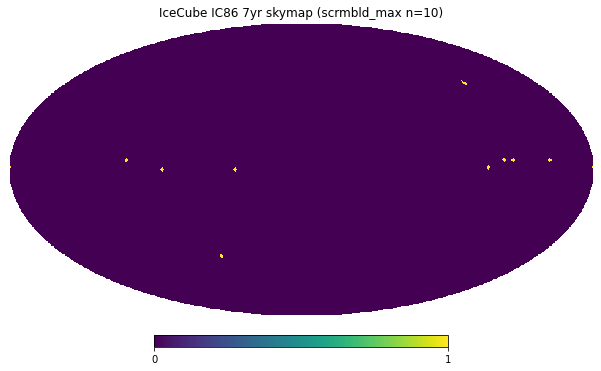

In [57]:
# now I want to plot these max_p_value points on the skymap
skymap3_np = np.zeros(hp.nside2npix(NSIDE))
for point in bin_max_scr:
    skymap3_np[point] += 1

hp.mollview(map=skymap3_np, title="IceCube IC86 7yr skymap (scrmbld_max n=10)")

In [26]:
print(skymap3_np)

[0. 0. 0. ... 0. 0. 0.]


20


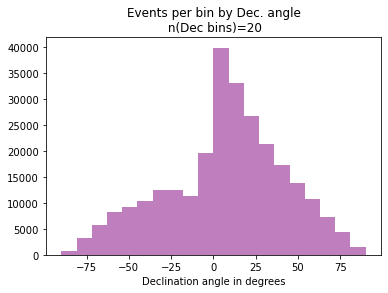

Plotted points:  269407
21


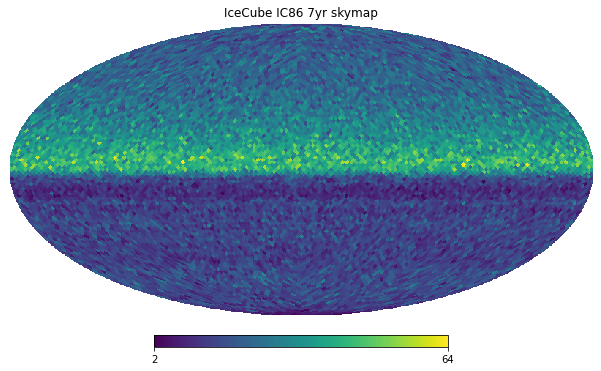

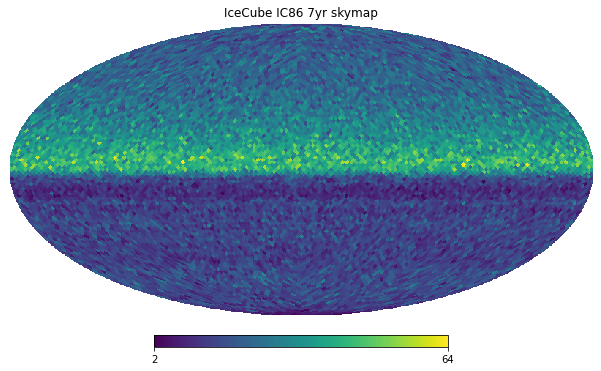

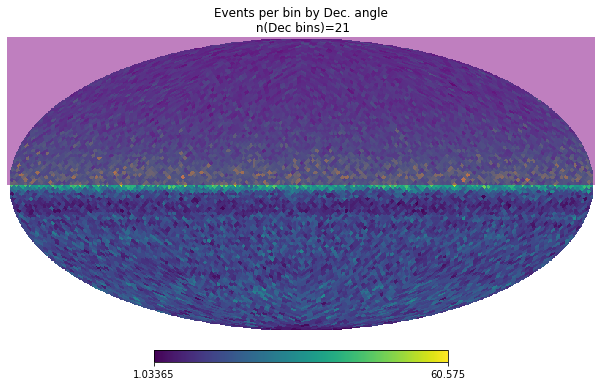

KeyboardInterrupt: 

In [9]:
for n_dec_bins in range(20,23):

    print(n_dec_bins)
    dec_label = "Events per bin by Dec. angle\n n(Dec bins)=" + str(n_dec_bins)
    decbin_content,decbin_boundaries,extra = plt.hist(data_7y['Decdeg'], n_dec_bins, facecolor='purple', alpha=0.5)
    plt.xlabel('Declination angle in degrees')
    plt.title(dec_label)
    plt.show()
    #print(decbin_content,decbin_boundaries)

    for bin in range(0,hp.nside2npix(NSIDE)):
        theta,phi = hp.pix2ang(NSIDE,bin)
        dec_vals.append(np.degrees(theta_to_dec(theta)))

    dec_vals2 = np.array(dec_vals)

    # use numpy's digitize function to "count in bins" -> returns an array telling you which bin each value is in
    hp_bins_mask = np.digitize(dec_vals2, decbin_boundaries)

    # count number of bins at each bin mask value:  total in that dec range
    hp_bins_perdec = [len(dec_vals2[hp_bins_mask == i]) for i in range(1, len(decbin_boundaries))]
    
    #print(len(hp_bins_perdec),hp_bins_perdec,sum(hp_bins_perdec))
    
    avg_bkg_perbin = decbin_content/hp_bins_perdec
    #print(avg_bkg_perbin)
    
    # Let's bin the data in a skymap healpix object
    #print('Using ',hp.nside2npix(NSIDE), ' pixels')
    ## seed skymap with 0 counts in each bin
    skymap = np.zeros(hp.nside2npix(NSIDE))
    n_plot = 0
    for ev in data_7y:
        if np.abs(ev["Decdeg"]) < 91.0:   # must avoid poles for later analysis/scrambling
            # shift dec to 0-180 instead of 90, -90   (note -1.0* (dec-90) to get North pole at 0 "theta" for healpy)
            binnum = hp.ang2pix(NSIDE, -1.0*(np.radians(ev["Decdeg"])-np.pi/2.0), np.radians(ev["RAdeg"]))
            skymap[binnum] += 1
            n_plot += 1
    hp.mollview(map=skymap, title="IceCube IC86 7yr skymap")
    print('Plotted points: ', n_plot)
    
    # Let's bin the data in a skymap healpix object
    #print('Using ',hp.nside2npix(NSIDE), ' pixels')
    ## seed skymap with 0 counts in each bin
    skymap = np.zeros(hp.nside2npix(NSIDE))
    n_plot = 0
    for ev in data_7y:
        if np.abs(ev["Decdeg"]) < 91.0:   # must avoid poles for later analysis/scrambling
            # shift dec to 0-180 instead of 90, -90   (note -1.0* (dec-90) to get North pole at 0 "theta" for healpy)
            binnum = hp.ang2pix(NSIDE, -1.0*(np.radians(ev["Decdeg"])-np.pi/2.0), np.radians(ev["RAdeg"]))
            skymap[binnum] += 1
            n_plot += 1
    hp.mollview(map=skymap, title="IceCube IC86 7yr skymap")
    #print('Plotted points: ', n_plot)
    
    # Calculate the difference between observed and expected counts, as well as the poisson pmf (assuming expected bkg is average expected rate)
    #then plot the difference skymap
    skymap2 = []
    p_val_map =[]
    for bin in range(0,hp.nside2npix(NSIDE)):
        theta,phi = hp.pix2ang(NSIDE,bin)
        bkg_bin = which_dec_bin(np.degrees(theta_to_dec(theta)),decbin_boundaries)
        skymap2.append(skymap[bin] - avg_bkg_perbin[bkg_bin])
        p_val_map.append(stats.poisson.pmf(skymap[bin], avg_bkg_perbin[bkg_bin]))

    title2 = "IceCube IC86 7yr skymap (bkg sub)\n n(Dec bins)=" + str(n_dec_bins)
    skymap2_np  = np.array(skymap2)
    hp.mollview(skymap2_np, title=title2)
    #print('Plotted points: ', n_plot, ' Max bin:',np.argmax(skymap2_np), np.max(skymap2_np))
    #skymap2_np
    

In [36]:
emin = np.amin(data_7y('AngErrdeg'))
#emax = np.amax(data_7y)
error = [emin]
print(error)

TypeError: 'numpy.ndarray' object is not callable

Items below here are older, for reference...

In [ ]:
coszen = np.cos(np.radians(data_7y['Zenithdeg']))
plt.hist(coszen, 20, facecolor='purple', alpha=0.5)
plt.xlabel('Cos(Zenith)')
plt.show()

In [ ]:
plt.hist(data_7y['RAdeg'], 50, facecolor='red', alpha=0.5)
plt.xlabel('RA(deg)')
plt.show()

In [ ]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

sindec = np.sin(np.radians(data_7y['Decdeg']))
plt.hist(sindec, 50, facecolor='purple', alpha=0.5)
plt.xlabel('Sin(Dec)')
plt.show()

In [ ]:
plt.hist(data_7y['Azimuthdeg'], 50, facecolor='red', alpha=0.5)
plt.xlabel('Azimuth(deg)')
plt.show()

In [ ]:
masktf = [data_7y['log10EGeV']<4.0]

reduced_azi = data_7y['Azimuthdeg'][data_7y['log10EGeV']<4.0]
print(masktf, len(masktf), len(data_7y), len(reduced_azi))


#reduce_azi = [data_7y['Azimuthdeg'](data_7y['log10EGeV']>4.0)]
plt.hist(reduced_azi, 50, facecolor='red', alpha=0.5)
plt.xlabel('Azimuth(deg)')
plt.show()

In [ ]:
## Calculate the exposure in time of this sample using the 'uptime' data
exposure_7 = np.genfromtxt('../data/uptime/IC86_VII_exp.csv', names=True, dtype=np_dtype)
exposure_6 = np.genfromtxt('../data/uptime/IC86_VI_exp.csv', names=True, dtype=np_dtype)
exposure_5 = np.genfromtxt('../data/uptime/IC86_V_exp.csv', names=True, dtype=np_dtype)
exposure_4 = np.genfromtxt('../data/uptime/IC86_IV_exp.csv', names=True, dtype=np_dtype)
exposure_3 = np.genfromtxt('../data/uptime/IC86_III_exp.csv', names=True, dtype=np_dtype)
exposure_2 = np.genfromtxt('../data/uptime/IC86_II_exp.csv', names=True, dtype=np_dtype)
exposure_1 = np.genfromtxt('../data/uptime/IC86_I_exp.csv', names=True, dtype=np_dtype)
## Concantenate these together into 1
exposure_7y = np.concatenate((exposure_7, exposure_6, exposure_5, exposure_4, exposure_3, exposure_2, exposure_1))

In [ ]:
exposure_7y


In [ ]:
total_livetime = 0
for run in exposure_7y:
    total_livetime += run['MJD_stopdays'] - run['MJD_startdays']
    
print(total_livetime, 'days')

In [ ]:
weight = []
for ev in data_7y:
    weight.append(1.0/total_livetime)
print(len(weight), weight[0])
sindec = np.sin(np.radians(data_7y['Decdeg']))
values, bins, junk = plt.hist(sindec, bins=20, facecolor='purple', alpha=0.5, weights = weight)
plt.xlabel('Sin(Dec)')
plt.ylabel('Events per day')
plt.show()
print(values)
print(bins)